<a href="https://colab.research.google.com/github/SanikaPanchabhai/19-ML-Practical/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Step 1: Import sales data from a CSV file into a Pandas DataFrame
input_file = '/content/retail_sales_dataset.csv'  # Replace with the path to your input file
df = pd.read_csv(input_file)

# Print columns to check for the correct column name for sales
print("Columns in the dataset:", df.columns)

# Step 2: Basic data cleaning
# 2.1 Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# 2.2 Remove rows with missing values (optional depending on your case)
df.dropna(inplace=True)

# 2.3 Add a new column for sales tax (assuming a 10% tax rate)
df['Sales Tax'] = df['Total Amount'] * 0.10  # Replace 'Total Amount' with your actual sales column name

# Step 3: Export the cleaned data to a new CSV file
output_file = 'cleaned_sales_data.csv'  # Replace with your desired output file path
df.to_csv(output_file, index=False)

print(f"Data has been cleaned and exported to {output_file}")


Columns in the dataset: Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')
Missing values in each column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Data has been cleaned and exported to cleaned_sales_data.csv


Bonus Assignmnet


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Correlation matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass     

<ipython-input-10-e653d2d46dfb>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-10-e653d2d46dfb>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

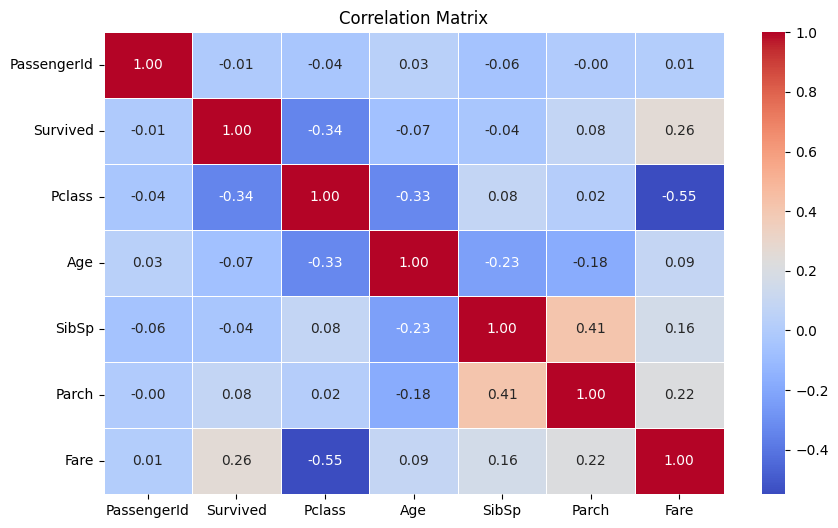

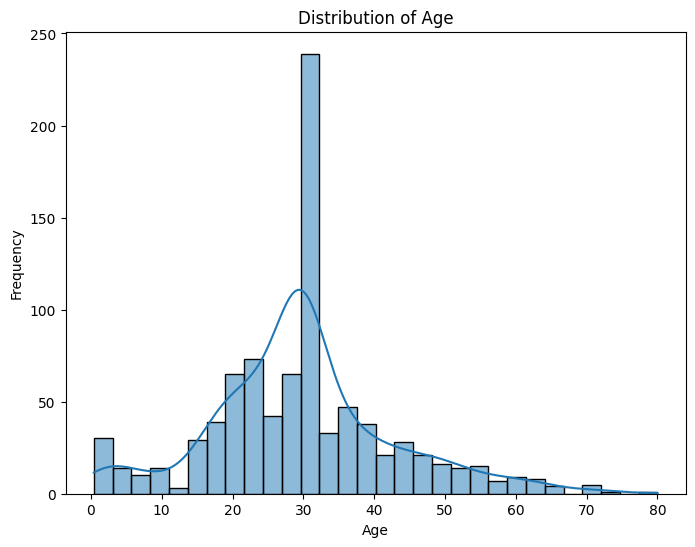

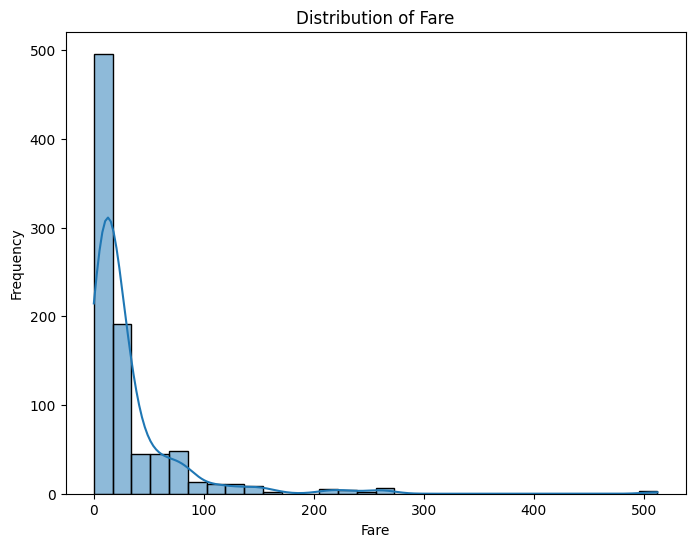

<ipython-input-10-e653d2d46dfb>:58: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None)


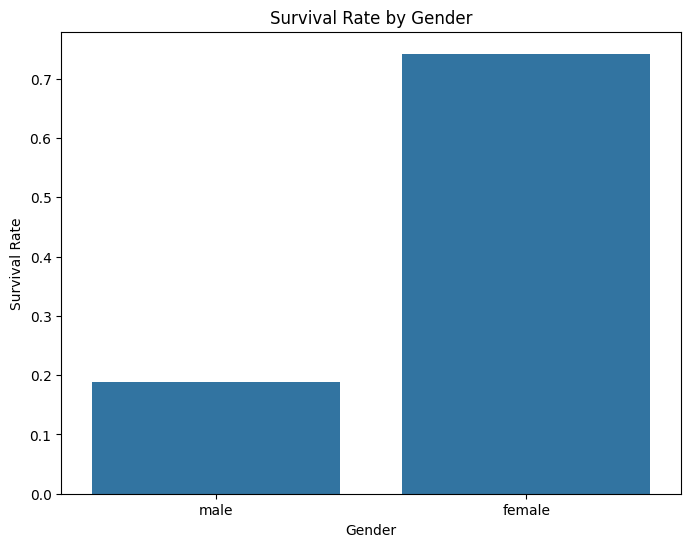

Data has been cleaned and exported to cleaned_titanic_data.csv


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
input_file = '/content/Titanic-Dataset.csv'  # Replace with the path to your Titanic dataset
df = pd.read_csv(input_file)

# Step 2: Data Cleaning
# 2.1 Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# 2.2 Handle missing values
# Fill missing 'Age' values with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing 'Embarked' values with the most frequent value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Step 3: Exploratory Data Analysis (EDA)
# 3.1 Correlation matrix
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

correlation_matrix = numeric_df.corr() # Calculate correlation for numeric columns only
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 3.2 Distribution of numerical features
# Visualizing the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of Fare
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# 3.3 Visualizing the survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# Step 4: Export the cleaned data to a new CSV file
output_file = 'cleaned_titanic_data.csv'  # Specify output file path
df.to_csv(output_file, index=False)

print(f"Data has been cleaned and exported to {output_file}")